# Preparate a cropped image of the New South Wales fire

In [1]:
from pathlib import Path
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
from functions import crop_scene, load_scene, rgb_composite, save_scene

Load and crop the scene.

In [2]:
region = [3000, 5500, 1500, 5000]
scene = crop_scene(
    load_scene(
        "/home/leo/Dropbox/leo/liverpool/ENVS258-EnvironmentalGeophysics/data/new_south_wales_fire_2019/LC08_L1TP_090083_20191215_20201022_02_T1/", 
        pattern="[2-4]",
    ),
    region,
)
scene_l2 = crop_scene(
    load_scene(
        "/home/leo/Dropbox/leo/liverpool/ENVS258-EnvironmentalGeophysics/data/new_south_wales_fire_2019/LC08_L2SP_090083_20191215_20201022_02_T1/", 
        pattern="[0-9]*",
    ),
    region,
)
for band in [1, 2, 3, 4, 5, 6]:
    scene_l2.pop(band)

Plot it to make sure it looks good.

In [3]:
rgb = rgb_composite(scene, in_range=(5000, 18000))

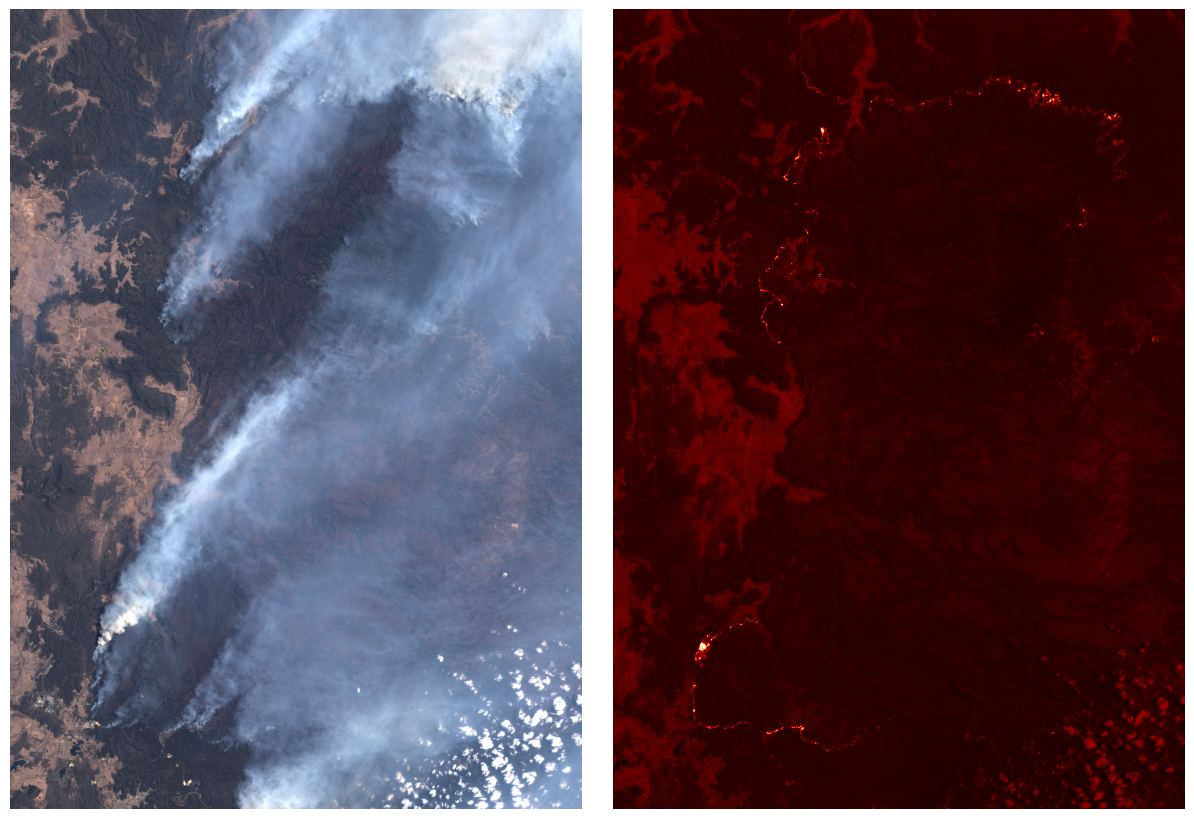

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8), dpi=100)
ax1, ax2 = axes
ax1.imshow(rgb)
ax2.imshow(scene_l2[7], cmap="gist_heat")
for ax in axes:
    ax.axis("off")
plt.tight_layout(pad=0, w_pad=0.5, h_pad=0)

Save the important bands of these scenes to TIF files.

In [5]:
data_folder = Path("../data/new_south_wales/")
scenes = [scene, scene_l2]
destinations = [
    data_folder / "LC08_L1TP_090083_20191215_20201022_02_T1_cropped",
    data_folder / "LC08_L2SP_090083_20191215_20201022_02_T1_cropped",
]
prefixes = [
    "LC08_L1TP_090083_20191215_20201022_02_T1_",
    "LC08_L2SP_090083_20191215_20201022_02_T1_",
]
for scene, destination, prefix in zip(scenes, destinations, prefixes):
    save_scene(scene, destination, prefix)

In [6]:
! du -h ../data/new_south_wales/*/*

17M	../data/new_south_wales/LC08_L1TP_090083_20191215_20201022_02_T1_cropped/LC08_L1TP_090083_20191215_20201022_02_T1_B2.TIF
17M	../data/new_south_wales/LC08_L1TP_090083_20191215_20201022_02_T1_cropped/LC08_L1TP_090083_20191215_20201022_02_T1_B3.TIF
17M	../data/new_south_wales/LC08_L1TP_090083_20191215_20201022_02_T1_cropped/LC08_L1TP_090083_20191215_20201022_02_T1_B4.TIF
17M	../data/new_south_wales/LC08_L2SP_090083_20191215_20201022_02_T1_cropped/LC08_L2SP_090083_20191215_20201022_02_T1_B10.TIF
17M	../data/new_south_wales/LC08_L2SP_090083_20191215_20201022_02_T1_cropped/LC08_L2SP_090083_20191215_20201022_02_T1_B7.TIF
